In [18]:
import pandas as pd
import gensim
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [4]:
df = pd.read_csv('data/train_2024.csv')
df

,id,text,label
0,0,Except that Desmond played first base last nig...,0
1,1,What i find funny is the loyalty and blindness...,0
2,2,Read the article not just the headline & you ...,0
3,3,Speaking of a horses backside is that where y...,1
4,4,Michael Barone- gee are you dumb. No other wo...,1
...,...,...,...
98624,98995,the libs could just pass a law that pulls them...,1
98625,98996,Really? How does this post in any way relate t...,0
98626,98997,Hey illegals if your reading this get the hel...,1
98627,98998,"Excellent description ""he playground bully ol...",1


In [5]:
stop_words = set(stopwords.words('english'))

In [13]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower().strip() for word in tokens if word.lower().strip() not in stop_words]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

In [14]:
df['preprocessed_text'] = df['text'].apply(preprocess_text)
print(df[['text', 'preprocessed_text']].head())

                                                text  \
0  Except that Desmond played first base last nig...   
1  What i find funny is the loyalty and blindness...   
2  Read the article  not just the headline & you ...   
3  Speaking of a horses backside  is that where y...   
4  Michael Barone- gee are you dumb.  No other wo...   

                                   preprocessed_text  
0  Except Desmond played first base last night . ...  
1  find funny loyalty blindness english community...  
2                     Read article headline & find .  
3                    Speaking horses backside head ?  
4          Michael Barone- gee dumb . words needed .  


In [15]:
df

,id,text,label,preprocessed_text
0,0,Except that Desmond played first base last nig...,0,Except Desmond played first base last night . ...
1,1,What i find funny is the loyalty and blindness...,0,find funny loyalty blindness english community...
2,2,Read the article not just the headline & you ...,0,Read article headline & find .
3,3,Speaking of a horses backside is that where y...,1,Speaking horses backside head ?
4,4,Michael Barone- gee are you dumb. No other wo...,1,Michael Barone- gee dumb . words needed .
...,...,...,...,...
98624,98995,the libs could just pass a law that pulls them...,1,libs could pass law pulls treaty easily exited...
98625,98996,Really? How does this post in any way relate t...,0,Really ? post way relate article ? article : “...
98626,98997,Hey illegals if your reading this get the hel...,1,Hey illegals reading get hell country
98627,98998,"Excellent description ""he playground bully ol...",1,Excellent description `` playground bully old ...


In [16]:
for idx, row in df.head().iterrows():
    original_text = row['text']
    preprocessed_text = row['preprocessed_text']
    print(f"Original Text ({idx}): {original_text}")
    print(f"Preprocessed Text ({idx}): {preprocessed_text}")
    print()

Original Text (0): Except that Desmond played first base last night. Tapia was in LF  and Reynolds had a night off.
Preprocessed Text (0): Except Desmond played first base last night . Tapia LF Reynolds night .

Original Text (1): What i find funny is the loyalty and blindness of english community. The worst possible choice for them is liberal and yet they keep voting for them every time. They keep renewing hope every election 1 year prior to it  just to ignore them at the winning speach already. Honestly PQ have more respect for english community then liberal  at least they dont lie to you just to get your vote. That being said i dont vote PQ either tired of those old man but that is another story. I mostly vote local candidate regardless of party even voted liberal once.. Outch that was hard to admit. But seriously guy's drop the act anti PQ anti QS dont vote for CAQ cause they dont win etc.. Any of those will at least respect you when they say no. And most of time they will say yes 

In [19]:
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in df['preprocessed_text']]
model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

In [20]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

C:\Users\User\anaconda3\envs\football\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\envs\football\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128580 (\N{FACE WITH ROLLING EYES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\envs\football\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\envs\football\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\envs\football\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127 () missing from current font.
  fig.canvas.print_figure(

C:\Users\User\anaconda3\envs\football\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\envs\football\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128128 (\N{SKULL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\envs\football\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 120424 (\N{MATHEMATICAL SANS-SERIF BOLD ITALIC SMALL S}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\envs\football\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 120410 (\N{MATHEMATICAL SANS-SERIF BOLD ITALIC SMALL E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\envs\football\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 120425 (\N{MATHEMATICAL SANS-SERIF BOLD ITALIC SMA

C:\Users\User\anaconda3\envs\football\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128079 (\N{CLAPPING HANDS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\envs\football\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127998 (\N{EMOJI MODIFIER FITZPATRICK TYPE-5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\envs\football\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128071 (\N{WHITE DOWN POINTING BACKHAND INDEX}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\envs\football\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\envs\football\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 4108 (\N{MYANM

C:\Users\User\anaconda3\envs\football\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127853 (\N{LOLLIPOP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\envs\football\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 61514 (\uf04a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\envs\football\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127829 (\N{SLICE OF PIZZA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\envs\football\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127818 (\N{TANGERINE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\envs\football\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128591 (\N{PERSON WITH FOLDED HANDS}) missing from current font.
  fig.canvas.print_figure(bytes_io, 

C:\Users\User\anaconda3\envs\football\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128064 (\N{EYES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\envs\football\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\envs\football\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65281 (\N{FULLWIDTH EXCLAMATION MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\envs\football\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\envs\football\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129412 (\N{UNICORN FACE}) missing from current font.
  fig.canvas.print_figure(byt

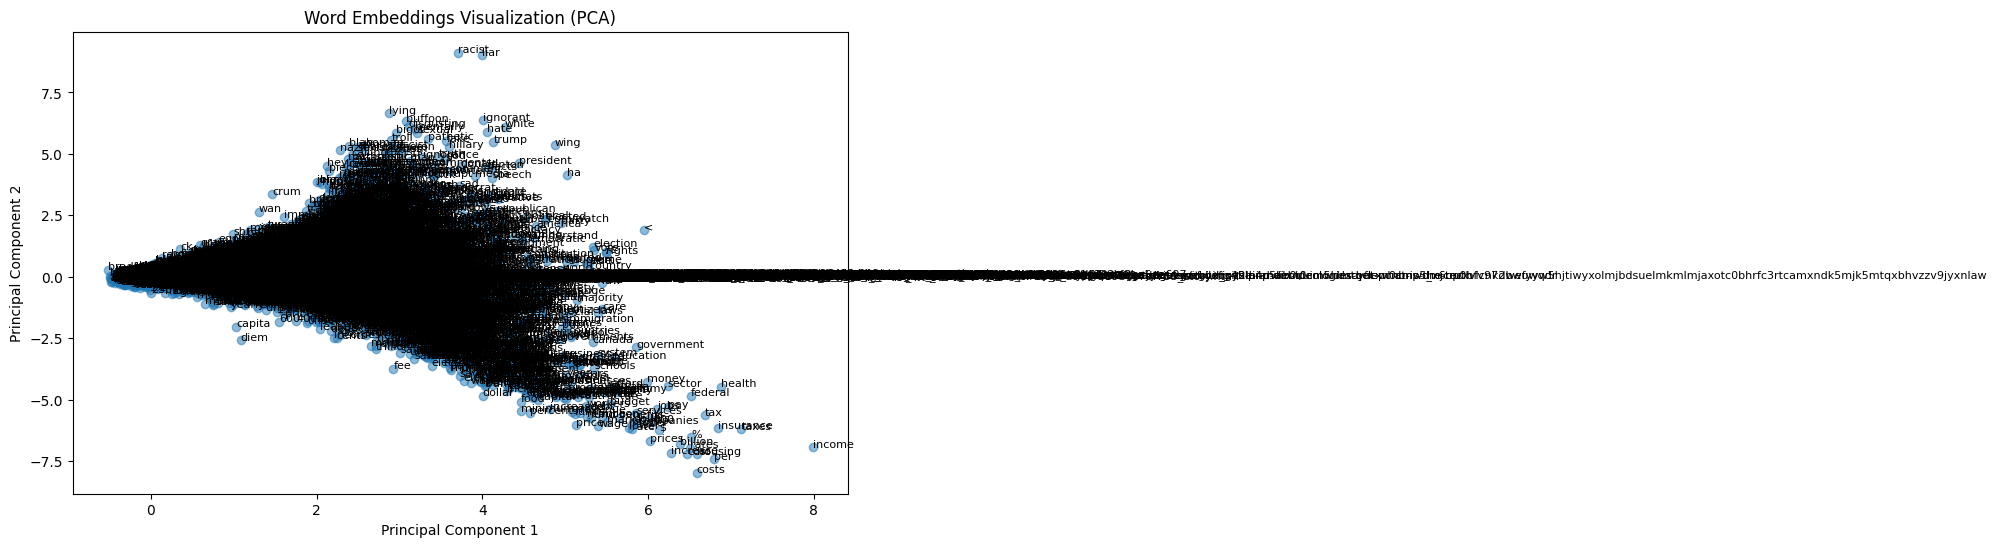

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(model.wv.vectors)

# Visualize PCA
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
words = list(model.wv.index_to_key)
for i, word in enumerate(words):
    plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]), fontsize=8)
plt.title('Word Embeddings Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Reduce dimensionality for visualization (t-SNE)
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)
tsne_result = tsne.fit_transform(model.wv.vectors)

# Visualize t-SNE
plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.5)
words = list(model.wv.index_to_key)
for i, word in enumerate(words):
    plt.annotate(word, xy=(tsne_result[i, 0], tsne_result[i, 1]), fontsize=8)
plt.title('Word Embeddings Visualization (t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()